<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/2020_chapter_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章: ニューラルネット
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ．

## 70. 単語ベクトルの和による特徴量
***
問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例$x_i$の特徴ベクトル$\boldsymbol{x}_i$を並べた行列$X$と正解ラベルを並べた行列（ベクトル）$Y$を作成したい．

$$
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}
$$

ここで，$n$は学習データの事例数であり，$\boldsymbol x_i \in \mathbb{R}^d$と$y_i \in \mathbb N$はそれぞれ，$i \in \{1, \dots, n\}$番目の事例の特徴量ベクトルと正解ラベルを表す．
なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．$\mathbb N_{<4}$で$4$未満の自然数（$0$を含む）を表すことにすれば，任意の事例の正解ラベル$y_i$は$y_i \in \mathbb N_{<4}$で表現できる．
以降では，ラベルの種類数を$L$で表す（今回の分類タスクでは$L=4$である）．

$i$番目の事例の特徴ベクトル$\boldsymbol x_i$は，次式で求める．

$$\boldsymbol x_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})$$

ここで，$i$番目の事例は$T_i$個の（記事見出しの）単語列$(w_{i,1}, w_{i,2}, \dots, w_{i,T_i})$から構成され，$\mathrm{emb}(w) \in \mathbb{R}^d$は単語$w$に対応する単語ベクトル（次元数は$d$）である．すなわち，$i$番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが$\boldsymbol x_i$である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．$300$次元の単語ベクトルを用いたので，$d=300$である．
$i$番目の事例のラベル$y_i$は，次のように定義する．

$$
y_i = \begin{cases}
0 & (\mbox{記事}\boldsymbol x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}\boldsymbol x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}\boldsymbol x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}\boldsymbol x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}
$$

なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

+ 学習データの特徴量行列: $X_{\rm train} \in \mathbb{R}^{N_t \times d}$
+ 学習データのラベルベクトル: $Y_{\rm train} \in \mathbb{N}^{N_t}$
+ 検証データの特徴量行列: $X_{\rm valid} \in \mathbb{R}^{N_v \times d}$
+ 検証データのラベルベクトル: $Y_{\rm valid} \in \mathbb{N}^{N_v}$
+ 評価データの特徴量行列: $X_{\rm test} \in \mathbb{R}^{N_e \times d}$
+ 評価データのラベルベクトル: $Y_{\rm test} \in \mathbb{N}^{N_e}$

なお，$N_t, N_v, N_e$はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive

MyDrive


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2021-11-21 08:37:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip.1’

NewsAggregatorDatas 100%[===================>]  27.87M  32.4MB/s    in 0.9s    

2021-11-21 08:37:11 (32.4 MB/s) - ‘NewsAggregatorDataset.zip.1’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
replace 2pageSessions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [ ]:
!head -10 ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [ ]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('./newsCorpora_re.csv',header=None,sep='\t',names = ['ID','TITLE','URL','PUBLISHER','CATEGORY','STORY','HOSTNAME','TIMESTAMP'])
df.head(2)


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207


In [ ]:
#@title
df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [ ]:
len(set(df.PUBLISHER))

10993

In [ ]:
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']),['TITLE','CATEGORY']]
df.head(3)

,TITLE,CATEGORY
12,Europe reaches crunch point on banking union,b
13,ECB FOCUS-Stronger euro drowns out ECB's messa...,b
19,"Euro Anxieties Wane as Bunds Top Treasuries, S...",b


In [ ]:
train,valid_test = train_test_split(df,test_size=0.2,shuffle=True,random_state=123,stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test,test_size=0.5,shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])
# train.shape, valid.shape, test.shape

print('【学習データ】')
print(train.CATEGORY.value_counts())
print('【検証データ】')
print(valid.CATEGORY.value_counts())
print('【評価データ】')
print(test.CATEGORY.value_counts())

【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [ ]:
# len(train)
4501+  4235+ 1220+  728

10684

In [ ]:
# train.to_csv('/content/drive/MyDrive/NLP100/val_2020年/work/train.tsv', index=False, sep='\t', header=False)
# valid.to_csv('/content/drive/MyDrive/NLP100/val_2020年/work/valid.tsv', index=False, sep='\t', header=False)
# test.to_csv('/content/drive/MyDrive/NLP100/val_2020年/work/test.tsv', index=False, sep='\t', header=False)

In [ ]:
import gdown
from gensim.models import KeyedVectors

In [ ]:
import gdown
from gensim.models import KeyedVectors

# model = KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

# # 学習済み単語ベクトルのダウンロード
# url = "https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM"
# output = 'GoogleNews-vectors-negative300.bin.gz'
# gdown.download(url, output, quiet=True)
 
# # ダウンロードファイルのロード
# model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

model = KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
import string
import torch

In [ ]:
def transform_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))#string.punctuation(!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
  words = text.translate(table).split() # 記号をスペースに置換後、スペースで分割してリスト化
  vec = [ model[word] for word in words if word in model]#wordがmodelの中にあればTrue
  
  return torch.tensor(sum(vec) / len(vec)) # 平均ベクトルをTensor型に変換して出力

In [ ]:
X_train = torch.stack([transform_w2v(text) for text in train.TITLE])
X_valid = torch.stack([transform_w2v(text) for text in valid.TITLE])
X_test = torch.stack([transform_w2v(text) for text in test.TITLE])
print(X_train)
print(len((X_train)[1]))
print(X_train.ndim)

tensor([[ 0.0837,  0.0056,  0.0068,  ...,  0.0751,  0.0433, -0.0868],
        [ 0.0272,  0.0266, -0.0947,  ..., -0.1046, -0.0489, -0.0092],
        [ 0.0577, -0.0159, -0.0780,  ..., -0.0421,  0.1229,  0.0876],
        ...,
        [ 0.0392, -0.0052,  0.0686,  ..., -0.0175,  0.0061, -0.0224],
        [ 0.0798,  0.1017,  0.1066,  ..., -0.0752,  0.0623,  0.1138],
        [ 0.1664,  0.0451,  0.0508,  ..., -0.0531, -0.0183, -0.0039]])
300
2


In [ ]:
# ラベルベクトルの作成
set(train.CATEGORY)

{'b', 'e', 'm', 't'}

In [ ]:
category_dict = {'b':0, 'e':1, 'm':2, 't':3}
y_train =torch.LongTensor(train.CATEGORY. map(lambda x : category_dict[x]).values)
y_valid =torch.LongTensor(valid.CATEGORY. map(lambda x : category_dict[x]).values)
y_test =torch.LongTensor(test.CATEGORY. map(lambda x : category_dict[x]).values)

print(y_train.size())
print(y_valid.size())
print(y_test.size())
print(y_train)

torch.Size([10684])
torch.Size([1336])
torch.Size([1336])
tensor([0, 3, 2,  ..., 0, 2, 1])


In [ ]:
# 保存
torch.save(X_train, 'X_train.pt')
torch.save(X_valid, 'X_valid.pt')
torch.save(X_test, 'X_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_valid, 'y_valid.pt')
torch.save(y_test, 'y_test.pt')

## 71. 単層ニューラルネットワークによる予測
***
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

$$
\hat{y}_1=softmax(x_1W),\\\hat{Y}=softmax(X_{[1:4]}W)
$$

ただし，$softmax$はソフトマックス関数，$X_{[1:4]}∈\mathbb{R}^{4×d}$は特徴ベクトル$x_1$,$x_2$,$x_3$,$x_4$を縦に並べた行列である．

$$
X_{[1:4]}=\begin{pmatrix}x_1\\x_2\\x_3\\x_4\end{pmatrix}
$$

行列$W \in \mathbb{R}^{d \times L}$は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，$\hat{\boldsymbol y_1} \in \mathbb{R}^L$は未学習の行列$W$で事例$x_1$を分類したときに，各カテゴリに属する確率を表すベクトルである．
同様に，$\hat{Y} \in \mathbb{R}^{n \times L}$は，学習データの事例$x_1, x_2, x_3, x_4$について，各カテゴリに属する確率を行列として表現している．



In [ ]:
from torch import nn

In [ ]:
class SLPNet(nn.Module):
  def __init__(self, input_size,output_size):
    super().__init__()
    self.fc = nn.Linear(input_size,output_size,bias=False)
    nn.init.normal_(self.fc.weight,0.0, 1.0)  # 正規乱数で重みを初期化 
    
  def forward(self,x):
    x = self.fc(x)
    return x


In [ ]:
model = SLPNet(300,4)
y_hat_1 = torch.softmax(model(X_train[:1]),dim=-1)#1行目（x1）
print(y_hat_1)
[0.2091+ 0.0288+ 0.0318+ 0.7303]

tensor([[0.0126, 0.7438, 0.0326, 0.2110]], grad_fn=<SoftmaxBackward0>)


[1.0]

In [ ]:
Y_hat = torch.softmax(model(X_train[:4]),dim=-1)#1行目～4行目（X1,X2,X3,X4）
print(Y_hat)
[0.3519+ 0.3375+ 0.1571+ 0.1534]

tensor([[0.0126, 0.7438, 0.0326, 0.2110],
        [0.0422, 0.0782, 0.0823, 0.7973],
        [0.0578, 0.1308, 0.2448, 0.5667],
        [0.1446, 0.1187, 0.1350, 0.6016]], grad_fn=<SoftmaxBackward0>)


[0.9999]

In [ ]:
Y_hat = torch.softmax(model(X_train[:4]),dim=-1)#1行目～4行目（X1,X2,X3,X4）
print(Y_hat)
[0.3519+ 0.3375+ 0.1571+ 0.1534]

tensor([[0.0126, 0.7438, 0.0326, 0.2110],
        [0.0422, 0.0782, 0.0823, 0.7973],
        [0.0578, 0.1308, 0.2448, 0.5667],
        [0.1446, 0.1187, 0.1350, 0.6016]], grad_fn=<SoftmaxBackward0>)


[0.9999]

## 72. 損失と勾配の計算
***
学習データの事例$x_1$と事例集合$x_1$,$x_2$,$x_3$,$x_4$に対して，クロスエントロピー損失と，行列$W$に対する勾配を計算せよ．なお，ある事例$x_i$に対して損失は次式で計算される．

$$l_i=−log[事例x_iがy_iに分類される確率]$$

ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

In [ ]:
criterion=nn.CrossEntropyLoss()

In [ ]:
l_1 = criterion(model.forward(X_train[:1]),y_train[:1])
# model.zero_grad()
# l_1.backward()
print(f'損失{l_1:.3f}')
print(f'勾配\n{model.fc.weight.grad}')


損失4.377
勾配
None


In [ ]:
l_1 = criterion(model.forward(X_train[:1]),y_train[:1])
model.zero_grad()
l_1.backward()
print(f'損失{l_1:.3f}')
print(f'勾配\n{model.fc.weight.grad}')


損失4.377
勾配
tensor([[-0.0826, -0.0056, -0.0067,  ..., -0.0742, -0.0428,  0.0857],
        [ 0.0622,  0.0042,  0.0051,  ...,  0.0559,  0.0322, -0.0646],
        [ 0.0027,  0.0002,  0.0002,  ...,  0.0025,  0.0014, -0.0028],
        [ 0.0177,  0.0012,  0.0014,  ...,  0.0159,  0.0091, -0.0183]])


## 73. 確率的勾配降下法による学習
***
確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列$W$を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
class CreateDataset(Dataset):
  def __init__(self,X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self,idx):
    return [self.X[idx],self.y[idx]]


In [ ]:
dataset_train = CreateDataset(X_train,y_train)
dataset_valid = CreateDataset(X_valid,y_valid)
dataset_test = CreateDataset(X_test,y_test)

dataloader_train = DataLoader(dataset_train,batch_size=1, shuffle=True)
dataloader_valid = DataLoader(dataset_valid,batch_size=len(dataset_valid), shuffle=False)
dataloader_test = DataLoader(dataset_test,batch_size=len(dataset_test), shuffle=False)

print(len(dataset_train))
print(next(iter(dataloader_train)))
print(len(dataloader_train))

10684
[tensor([[ 0.0974, -0.0590,  0.0129, -0.0752,  0.0816, -0.0058, -0.0213, -0.1000,
          0.0000,  0.0201, -0.0421,  0.0469,  0.0629,  0.0401,  0.0284, -0.0060,
          0.0946,  0.1228, -0.0284,  0.0722,  0.0040,  0.0944,  0.0681,  0.0321,
          0.0323,  0.0095, -0.0907,  0.0784,  0.0972,  0.1361, -0.0751, -0.0549,
         -0.0284, -0.0406, -0.0522, -0.1461,  0.0013, -0.0089, -0.0919,  0.0181,
         -0.0152, -0.0211,  0.0762,  0.0980,  0.0101, -0.1156, -0.0200, -0.0522,
          0.0087,  0.2402, -0.1449,  0.0845,  0.1138, -0.0142, -0.0301,  0.1239,
         -0.0617,  0.0099,  0.0733, -0.1631, -0.1576,  0.1301, -0.1543, -0.0383,
          0.0462, -0.0139, -0.0148,  0.0078,  0.0774,  0.0580, -0.0902, -0.0735,
          0.0464,  0.0430,  0.0170, -0.0758,  0.0358,  0.1166, -0.0362,  0.0586,
         -0.0456, -0.0943, -0.0178, -0.0754, -0.0821, -0.1226, -0.0491,  0.1513,
         -0.0307, -0.0943,  0.0816, -0.0400, -0.0186, -0.0365, -0.0286,  0.0393,
          0.1292,  0.

In [ ]:
model = SLPNet(300,4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-1)
num_epochs = 3

for epoch in range(num_epochs):
  model.train()
  loss_train = 0.0
  for i , (inputs,labels) in enumerate(dataloader_train):# i = バッチのインデックス  
    optimizer.zero_grad()
    output = model.forward(inputs)
    loss = criterion(output, labels)
    loss_train += loss.item()#.item() -> 要素が1個のtensorから値の取り出し
    loss.backward()
    optimizer.step()
  loss_train = loss_train / i

  model.eval()
  with torch.no_grad():
    inputs , labels  =  next(iter(dataloader_valid))
    outputs = model.forward(inputs)
    loss_valid = criterion(outputs,labels)
  print(f'epoch:{epoch+1},loss_train{loss_train:.4f}, loss_valid{loss_valid:.4f}')



epoch:1,loss_train0.4654, loss_valid0.3444
epoch:2,loss_train0.3062, loss_valid0.3177
epoch:3,loss_train0.2790, loss_valid0.3075


## 74. 正解率の計測
***
問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

In [ ]:
def calculate_accuracy(model, X,y):
  model.eval()
  with torch.no_grad():
    output = model(X)
    pred = torch.argmax(output, dim=-1)
  # predで最大値のクラスを返す 

  return (pred == y).sum() / len(y)
  


In [ ]:
acc_train = calculate_accuracy(model,X_train,y_train)
acc_test = calculate_accuracy(model,X_test,y_test)
print(f'正解率(学習データ)：{acc_train:.3f}%')
print(f'正解率(評価データ)：{acc_test:.3f}%')
# acc_train

正解率(学習データ)：0.911%
正解率(評価データ)：0.895%


## 75. 損失と正解率のプロット
***
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [ ]:
def calculate_loss_and_accuracy(model, criterion, loader):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return loss / len(loader), correct / total

In [ ]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 5
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')

epoch: 1, loss_train: 0.3258, accuracy_train: 0.8859, loss_valid: 0.3492, accuracy_valid: 0.8802
epoch: 2, loss_train: 0.2828, accuracy_train: 0.9034, loss_valid: 0.3189, accuracy_valid: 0.8997
epoch: 3, loss_train: 0.2672, accuracy_train: 0.9069, loss_valid: 0.3155, accuracy_valid: 0.8967
epoch: 4, loss_train: 0.2526, accuracy_train: 0.9145, loss_valid: 0.3077, accuracy_valid: 0.8990
epoch: 5, loss_train: 0.2523, accuracy_train: 0.9125, loss_valid: 0.3130, accuracy_valid: 0.8997


In [ ]:
from matplotlib import pyplot as plt
import numpy as np


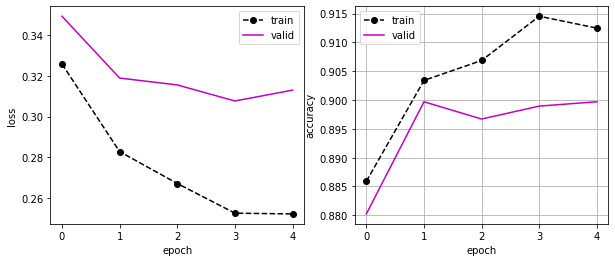

In [ ]:
fig, ax = plt.subplots(1,2 ,figsize = (10,4))
ax[0].plot(np.array(log_train).T[0], label='train',c = 'black',linestyle="dashed",marker='o')
ax[0].plot(np.array(log_valid).T[0], label='valid',c='m')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(np.array(log_train).T[1], label='train',c='black', linestyle="dashed",marker='o')
ax[1].plot(np.array(log_valid).T[1], label='valid',c='m')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.grid()
plt.show()

## 76. チェックポイント
***
問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

In [ ]:
model = SLPNet(300,4)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-1)
num_epochs = 3
log_train = []
log_valid = []

for epoch in range(num_epochs):
  model.train()
  
  for inputs, labels in dataloader_train:
    optimizer.zero_grad()

    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
  loss_train, acc_train = calculate_loss_and_accuracy(model,criterion,dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model,criterion,dataloader_valid)
  log_train.append([loss_train,acc_train])
  log_valid.append([loss_valid,acc_valid])

  torch.save({'epoch': epoch,'model_state_dict': model.state_dict(),'optimizer_state_dict':optimizer.state_dict()},f'checkpoint{epoch + 1}.pt')
  print(f'epoch : {epoch + 1},loss_train : {loss_train:.3f}, acc_train : {acc_train:.3f}, loss_valid : {loss_valid:.3f}, acc_valid : {acc_valid:.3f}')

  
    

epoch : 1,loss_train : 0.323, acc_train : 0.889, loss_valid : 0.358, acc_valid : 0.876
epoch : 2,loss_train : 0.282, acc_train : 0.904, loss_valid : 0.324, acc_valid : 0.894
epoch : 3,loss_train : 0.264, acc_train : 0.910, loss_valid : 0.318, acc_valid : 0.889


## 77. ミニバッチ化
***
問題76のコードを改変し，$B$事例ごとに損失・勾配を計算し，行列$W$の値を更新せよ（ミニバッチ化）．$B$の値を$1,2,4,8,…$と変化させながら，1エポックの学習に要する時間を比較せよ．

In [ ]:
import time

In [ ]:
def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer,num_epoch):

  dataloader_train = DataLoader(dataset_train ,batch_size=batch_size,shuffle=True)
  dataloader_valid= DataLoader(dataset_valid,batch_size=len(dataset_valid),shuffle=False)

  log_train = []
  log_valid = []

  for epoch in range(num_epoch):
    # s_time = time.time()
    model.train()
    for inputs, labels in dataloader_train:
      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    loss_train, acc_train = calculate_loss_and_accuracy(model,criterion,dataloader_train)
    loss_valid,acc_valid = calculate_loss_and_accuracy(model,criterion,dataloader_valid)
    log_train.append([loss_train,acc_train])
    log_valid.append([loss_valid,acc_valid])

    torch.save({'epoch':epoch, 'model_state_dict':model.state_dict(),'optimizer_state_dict':optimizer.state_dict()},f'checkpoint{epoch + 1}.pt')

    # e_time = time.time()

    print(f'epoch : {epoch+1}, loss_train : {loss_train:.4f}, acc_train : {acc_train:.4f},loss_valid : {loss_valid:.4f},acc_valid : {acc_valid:.4f} ')

  # return {'log_train ' : log_train, 'log_valid' : log_valid}

In [ ]:
dataset_train =CreateDataset(X_train, y_train)
dataset_valid =CreateDataset(X_valid, y_valid)

model = SLPNet(300,4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-1)

for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ : {batch_size}')
  train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1)

バッチサイズ : 1
epoch : 1, loss_train : 0.3269, acc_train : 0.8883,loss_valid : 0.3668,acc_valid : 0.8668 
バッチサイズ : 2
epoch : 1, loss_train : 0.2993, acc_train : 0.8972,loss_valid : 0.3442,acc_valid : 0.8765 
バッチサイズ : 4
epoch : 1, loss_train : 0.2898, acc_train : 0.9019,loss_valid : 0.3369,acc_valid : 0.8780 
バッチサイズ : 8
epoch : 1, loss_train : 0.2857, acc_train : 0.9026,loss_valid : 0.3336,acc_valid : 0.8757 
バッチサイズ : 16
epoch : 1, loss_train : 0.2841, acc_train : 0.9042,loss_valid : 0.3325,acc_valid : 0.8810 
バッチサイズ : 32
epoch : 1, loss_train : 0.2831, acc_train : 0.9040,loss_valid : 0.3317,acc_valid : 0.8787 
バッチサイズ : 64
epoch : 1, loss_train : 0.2827, acc_train : 0.9040,loss_valid : 0.3313,acc_valid : 0.8802 
バッチサイズ : 128
epoch : 1, loss_train : 0.2829, acc_train : 0.9043,loss_valid : 0.3312,acc_valid : 0.8802 
バッチサイズ : 256
epoch : 1, loss_train : 0.2824, acc_train : 0.9042,loss_valid : 0.3312,acc_valid : 0.8802 
バッチサイズ : 512
epoch : 1, loss_train : 0.2820, acc_train : 0.9042,loss_valid 

## 78. GPU上での学習
***
問題77のコードを改変し，GPU上で学習を実行せよ．

In [ ]:
def calculate_loss_and_accuracy(model, criterion, loader,device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs,dim=-1)
      correct += (pred == labels).sum().item()
      total = len(inputs)
  return loss / len(loader), correct / total

In [ ]:
def train_model(dataset_train, dataset_valid, batch_size,model,criterion, optimizer,num_epochs,device = None):
  model.to(device)

  dataloader_train = DataLoader(dataset_train,batch_size=batch_size,shuffle=True)
  dataloader_valid = DataLoader(dataset_valid,batch_size=len(dataset_valid),shuffle=False)

  # log_train = []
  # log_valid = []
  for epoch in range(num_epochs):
    s_time = time.time()
    
    model.train()
    for inputs, labels in dataloader_train:
      optimizer.zero_grad()

      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    loss_train,acc_train = calculate_loss_and_accuracy(model,criterion,dataloader_train, device)
    loss_valid,acc_valid = calculate_loss_and_accuracy(model,criterion,dataloader_valid, device)
    # log_train.append([loss_train,acc_train])
    # log_valid.append([loss_valid,acc_valid])
    
    # torch.save({'epoch':epoch,'model_state_dict':model.state_dict(),'optimizer_state_dict': optimizer.state_dict()},f'checkpoint{epoch+1}.pt')
    e_time = time.time()

    print(f'epoch : {epoch + 1},loss_train : {loss_train:.4f},acc_train : {acc_train:.4f}, loss_valid : {loss_valid:.4f},acc_valid{acc_valid:.4f},{(e_time - s_time):.4f}sec')


In [ ]:
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

model = SLPNet(300,4)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-1)

# num_epoch = 5
device = torch.device('cuda')

for batch_size in [ 2 ** i for i in range(11)]:
  print(f'バッチサイズ:{batch_size}')
  train_model(dataset_train, dataset_valid, batch_size,model,criterion, optimizer,1,device=device)


バッチサイズ:1
epoch : 1,loss_train : 0.3348,acc_train : 9452.0000, loss_valid : 0.3642,acc_valid0.8743,14.0418sec
バッチサイズ:2
epoch : 1,loss_train : 0.3043,acc_train : 4794.0000, loss_valid : 0.3399,acc_valid0.8832,7.0472sec
バッチサイズ:4
epoch : 1,loss_train : 0.2958,acc_train : 2406.0000, loss_valid : 0.3341,acc_valid0.8840,3.6631sec
バッチサイズ:8
epoch : 1,loss_train : 0.2907,acc_train : 2407.2500, loss_valid : 0.3303,acc_valid0.8840,1.9024sec
バッチサイズ:16
epoch : 1,loss_train : 0.2888,acc_train : 803.5000, loss_valid : 0.3289,acc_valid0.8855,1.0207sec
バッチサイズ:32
epoch : 1,loss_train : 0.2878,acc_train : 344.5357, loss_valid : 0.3282,acc_valid0.8855,0.5426sec
バッチサイズ:64
epoch : 1,loss_train : 0.2874,acc_train : 160.8333, loss_valid : 0.3279,acc_valid0.8855,0.3595sec
バッチサイズ:128
epoch : 1,loss_train : 0.2881,acc_train : 160.8167, loss_valid : 0.3278,acc_valid0.8862,0.2295sec
バッチサイズ:256
epoch : 1,loss_train : 0.2872,acc_train : 51.3298, loss_valid : 0.3277,acc_valid0.8862,0.1690sec
バッチサイズ:512
epoch : 1,loss_

## 79. 多層ニューラルネットワーク
***
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．

In [ ]:
from torch.nn import functional as F

In [ ]:
class MLPNet(nn.Module):
  def __init__(self, input_size, mid_size, output_size, mid_layers):
    super().__init__()
    self.mid_layers = mid_layers
    self.fc = nn.Linear(input_size, mid_size)
    self.fc_mid = nn.Linear(mid_size, mid_size)
    self.fc_out = nn.Linear(mid_size, output_size) 
    self.bn = nn.BatchNorm1d(mid_size)

  def forward(self, x):
    x = F.relu(self.fc(x))
    for _ in range(self.mid_layers):
      x = F.relu(self.bn(self.fc_mid(x)))
    x = F.relu(self.fc_out(x))
 
    return x

In [ ]:
from torch import optim

In [ ]:
def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0

  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs,dim= -1)
      correct += (pred == labels).sum().item()
      total += len(inputs)

  return loss / len(loader), correct / total

In [ ]:
def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  model.to(device)

  dataloader_train = DataLoader(dataset_train,batch_size=batch_size,shuffle=True)
  dataloader_valid = DataLoader(dataset_valid,batch_size=len(dataset_valid),shuffle=False)

  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=1e-5, last_epoch=-1)
  
  log_train = []
  log_valid = []

  for epoch in range(num_epochs):
    s_time = time.time()

    model.train()
    for inputs, labels in dataloader_train:
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid,acc_valid])
    e_time = time.time()
    print(f'epoch{epoch + 1},loss_train{loss_train:.4f},acc_train{acc_train:.4f},loss_valid{loss_valid:.4f},acc_valid{acc_valid:.4f},{(e_time - s_time):.4f}sec')

    if epoch >2 and log_valid[epoch -3][0] <= log_valid[epoch -2][0] <=log_valid[epoch-1][0]<=log_valid[epoch][0]:
      break

    scheduler.step()

  return {'train': log_train, 'valid':[log_valid]}





In [ ]:
dataset_train = CreateDataset(X_train,y_train)
dataset_valid = CreateDataset(X_valid,y_valid)

model = MLPNet(300,200,4,1)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

device = torch.device('cuda')
log = train_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, 30, device)

epoch1,loss_train1.3091,acc_train0.5179,loss_valid1.3157,acc_valid0.5052,0.5806sec
epoch2,loss_train0.8503,acc_train0.7639,loss_valid0.8543,acc_valid0.7612,0.6298sec
epoch3,loss_train0.6979,acc_train0.7756,loss_valid0.7018,acc_valid0.7710,0.6165sec
epoch4,loss_train0.6300,acc_train0.7823,loss_valid0.6351,acc_valid0.7784,0.6299sec
epoch5,loss_train0.5901,acc_train0.7884,loss_valid0.5970,acc_valid0.7829,0.6148sec
epoch6,loss_train0.5581,acc_train0.7980,loss_valid0.5670,acc_valid0.7934,0.5797sec
epoch7,loss_train0.5261,acc_train0.8098,loss_valid0.5384,acc_valid0.8061,0.5941sec
epoch8,loss_train0.5014,acc_train0.8206,loss_valid0.5153,acc_valid0.8211,0.5784sec
epoch9,loss_train0.4762,acc_train0.8338,loss_valid0.4920,acc_valid0.8353,0.6201sec
epoch10,loss_train0.4605,acc_train0.8454,loss_valid0.4774,acc_valid0.8383,0.6035sec
epoch11,loss_train0.4426,acc_train0.8550,loss_valid0.4604,acc_valid0.8391,0.5814sec
epoch12,loss_train0.4288,acc_train0.8594,loss_valid0.4480,acc_valid0.8443,0.5970sec
e

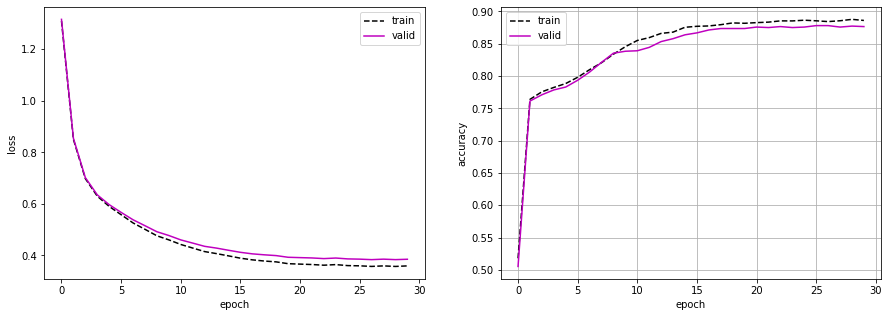

In [ ]:
# 可視化
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ax[0].plot(np.array(log_train).T[0], label='train',c = 'black',linestyle="dashed",marker='o')

ax[0].plot(np.array(log['train']).T[0], label='train',c = 'black', linestyle = 'dashed')
ax[0].plot(np.array(log['valid']).T[0], label='valid',c ='m')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log['train']).T[1], label='train',c = 'black', linestyle = 'dashed')
ax[1].plot(np.array(log['valid']).T[1], label='valid',c ='m')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.grid()
plt.show()

In [ ]:
def calculate_accuracy(model,X , y, device):
  model.eval()
  with torch.no_grad():
    inputs = X.to(device)
    outputs = model(inputs)
    pred = torch.argmax(outputs,dim=-1).cpu()

  return  (pred == y).sum().item() / len(y)

In [ ]:
acc_train = calculate_accuracy(model,X_train, y_train,device)
acc_test = calculate_accuracy(model,X_test, y_test,device)
print(f'正解率(学習データ) : {acc_train:.4f}')
print(f'正解率(評価データ) : {acc_test:.4f}')

正解率(学習データ) : 0.8175
正解率(評価データ) : 0.8219
